In [ ]:
import os.path
import cv2
import numpy as np
import pandas as pd

In [49]:
import glob
paths = "./datasets/test/"
a = glob.glob(paths)
labels = [i for i in range(34)]
df = pd.DataFrame(columns=["image_path", "label"])
for label in labels:
    b = glob.glob(paths + str(label) + "/*.png")
    for img_path in b:
        a = pd.DataFrame({"image_path": [img_path], "label": [label]})
        df = pd.concat([df, a], ignore_index=True)
print(df)
df.to_csv("./datasets/test.csv", index=False)

                           image_path label
0      ./datasets/test/0\syn00002.png     0
1      ./datasets/test/0\syn00065.png     0
2      ./datasets/test/0\syn00167.png     0
3      ./datasets/test/0\syn00210.png     0
4      ./datasets/test/0\syn00218.png     0
...                               ...   ...
6635  ./datasets/test/33\syn06187.png    33
6636  ./datasets/test/33\syn06448.png    33
6637  ./datasets/test/33\syn06482.png    33
6638  ./datasets/test/33\syn06526.png    33
6639  ./datasets/test/33\syn06534.png    33

[6640 rows x 2 columns]


In [1]:
data_dir = "./datasets/"  # 데이터 디렉토리 경로
train = os.path.join(data_dir, 'train.csv')  # 훈련 데이터 디렉토리 경로
test = os.path.join(data_dir, 'test.csv')  # 테스트 데이터 디렉토리 경로
train_df = pd.read_csv(train)  # 훈련 데이터셋 데이터프레임 파일
test_df = pd.read_csv(test)  # 테스트 데이터셋 데이터프레임 파일

NameError: name 'os' is not defined

In [ ]:
import torch
# GPU를 사용할 수 있는 경우, device를 'cuda'로 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
device

In [ ]:
# Image.open("./datasets/test/33\syn06534.png").convert("RGB")
a = cv2.imread("./datasets/test/33\syn06534.png")
b = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
plt.imshow(b)

NameError: name 'train_df' is not defined

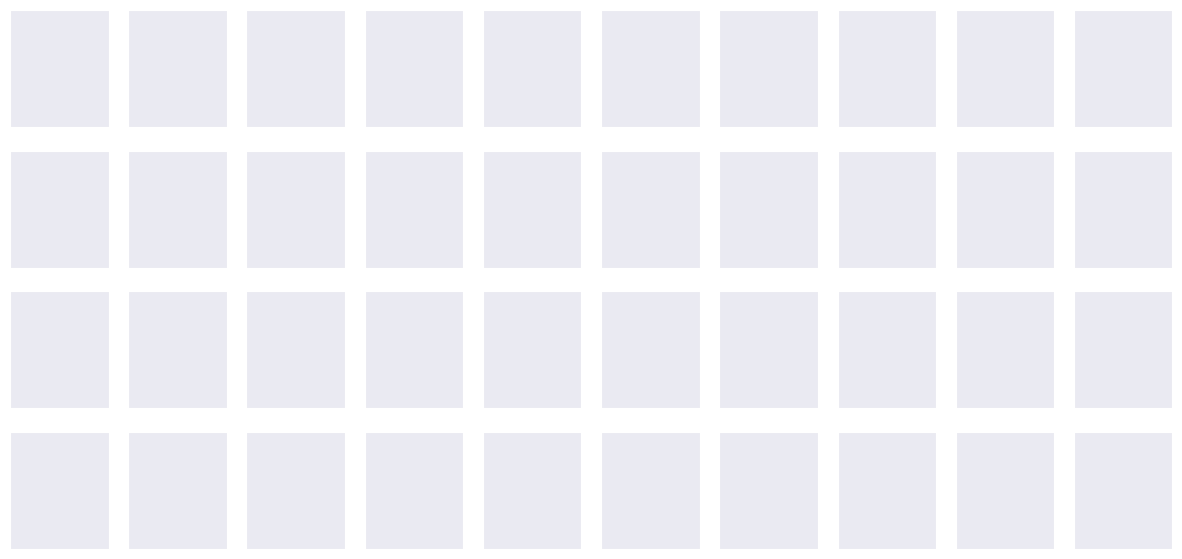

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
# 데이터 확인
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(train_df.image_path[i]))
    ax.set_title(train_df.label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

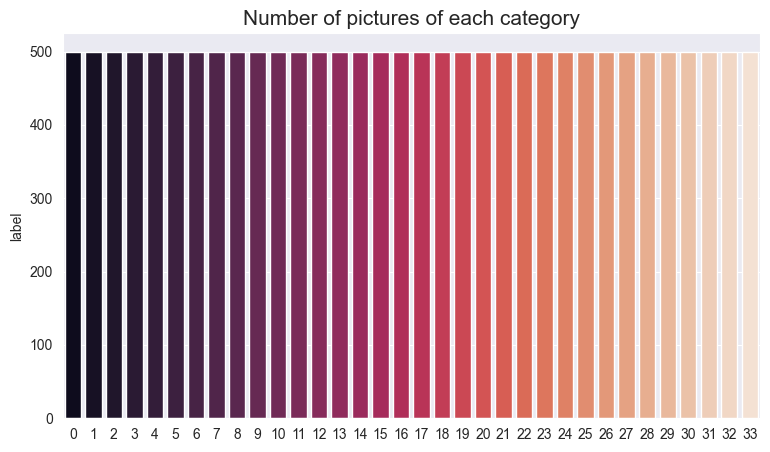

In [57]:
import seaborn as sns
vc = train_df['label'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [34]:
from torch.utils.data import Dataset
from PIL import Image
import pandas as pd
import torch
import os



In [33]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.transforms import functional as F
# 변환 및 데이터셋 설정
augmented_transform = transforms.Compose([
    transforms.AutoAugment(transforms.AutoAugmentPolicy.SVHN),
    transforms.ToTensor(),
    transforms.Resize((400, 400)),
    transforms.Lambda(lambda img: F.crop(img, top=250, left=50, height=150, width=350)),

    transforms.Resize((400, 400)),
])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((400, 400)),
    transforms.Lambda(lambda img: F.crop(img, top=250, left=50, height=150, width=350)),
    transforms.Resize((400, 400)),
])




# 이미지 확인하기

torch.Size([3, 400, 400])


IndexError: index 32 is out of bounds for dimension 0 with size 32

<Figure size 600x600 with 0 Axes>

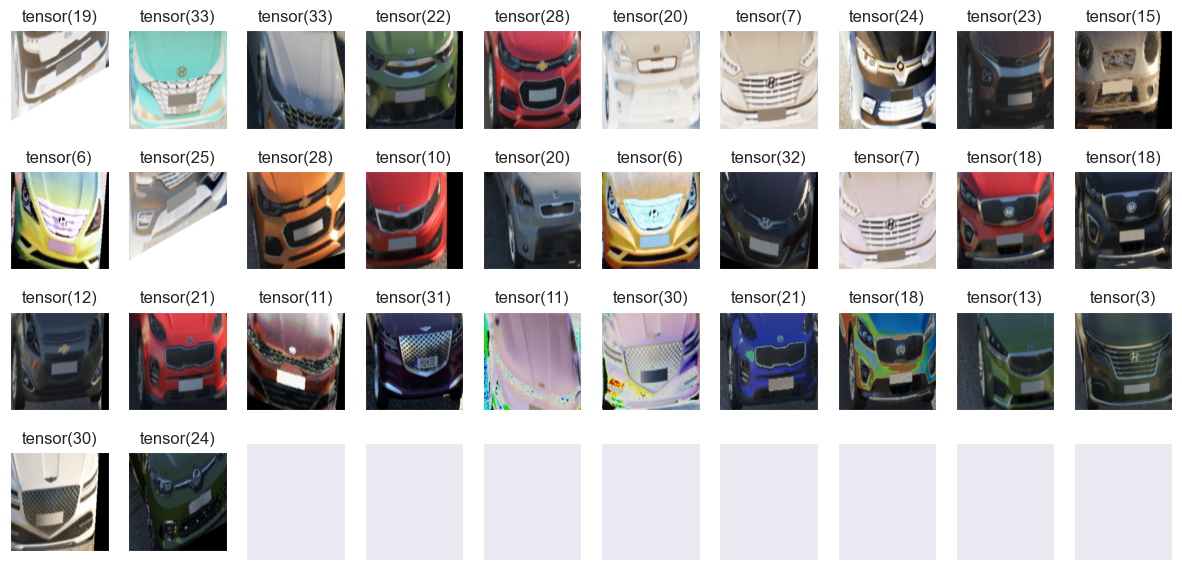

In [32]:
# 데이터셋 로드
train_dataset = datasets.ImageFolder(root='./datasets/train', transform=transform)

# 데이터로더 설정
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 1개의 배치를 추출합니다.
original_images, labels = next(iter(train_loader))

# 이미지의 shape을 확인합니다. 224 X 224 RGB 이미지 임을 확인합니다.
# (batch_size, channel, height, width)
original_images.shape
# [3, 292, 298] 채널, 가로, 세로


plt.figure(figsize=(6, 6))
# permute로 이미지의 shape를 다음과 같이 변경합니다
# (height, width, channel)
print(original_images[0].shape)

fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.set_title(labels[i], fontsize = 12)
    ax.imshow(original_images[i].permute(1, 2, 0))
plt.show()

In [454]:

len(a)

1579

In [489]:
b = glob.glob("./datasets/test/33/*")
for img in b:
    image = cv2.imread(img)
    if image.shape[0] < 120 or image.shape[1] < 120:
        # 이미지의 높이 또는 너비가 120보다 작은 경우 이미지 삭제
        os.remove(img)

10200 3400 3400
Training Data Size : 10200
Validation Data Size : 3400
Testing Data Size : 3400
torch.Size([3, 400, 400])


C:\Users\Parkjunho\anaconda3\envs\gluon\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


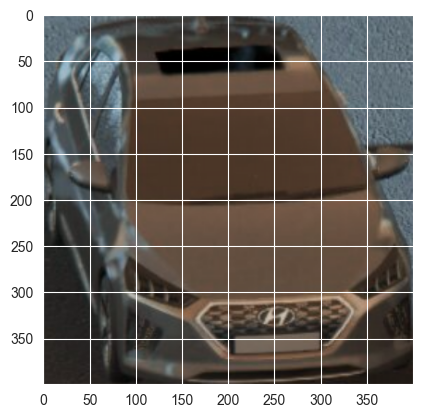

In [120]:
from PIL import ImageOps
from torch.utils.data import Dataset, DataLoader, random_split

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((400, 400)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


dataset = CustomImageDataset(dataframe=train_df, transform=transform)

dataset_size = len(dataset)
train_size = int(dataset_size * 0.6)
validation_size = int(dataset_size * 0.2)
test_size = dataset_size - train_size - validation_size

print(train_size, validation_size, test_size)

train_dataset, validation_dataset, test_dataset = random_split(dataset, [train_size, validation_size, test_size])

print(f"Training Data Size : {len(train_dataset)}")
print(f"Validation Data Size : {len(validation_dataset)}")
print(f"Testing Data Size : {len(test_dataset)}")

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, drop_last=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=4, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=True, drop_last=True)



# 데이터 한 장을 가져오고 출력
data_iterator = iter(train_dataloader)
image = next(data_iterator)
print(image[0][0].size())
# 이미지 출력
import matplotlib.pyplot as plt
to_pil = transforms.ToPILImage()
image = to_pil(image[0][0])
# rgb_image = image.convert("RGB")
# 이미지 출력
plt.imshow(image)
plt.show()

In [45]:
import torch
import torch.nn as nn
from torchvision.models import resnet50
# ResNet50 model
class ResNet50(nn.Module):
    def __init__(self, num_classes):
        super(ResNet50, self).__init__()
        self.base_model = resnet50(pretrained=True)
        num_features = self.base_model.fc.in_features
        self.base_model.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.base_model(x)


In [46]:

from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm

# 학습 함수
def train(model, train_dataloader, val_dataloader, criterion, optimizer, scheduler, device, num_epochs, patience):
    best_val_loss = float('inf')
    early_stop_counter = 0

    for epoch in range(num_epochs):
        train_loss = 0.0
        val_loss = 0.0

        # 훈련 과정
        model.train()
        for images, labels in tqdm(train_dataloader, desc=f"Epoch {epoch + 1} - Training"):
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)

        # 검증 과정
        model.eval()
        with torch.no_grad():
            for images, labels in tqdm(val_dataloader, desc=f"Epoch {epoch + 1} - Validation"):
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)

        # 손실 계산
        train_loss = train_loss / len(train_dataloader.dataset)
        val_loss = val_loss / len(val_dataloader.dataset)

        # 얼리 스톱 체크
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print(f"Early stopping at epoch {epoch + 1} as validation loss has not improved for {patience} epochs.")
                break

        # 학습률 스케줄링
        scheduler.step(val_loss)

        # 에폭별 결과 출력
        print(f"Epoch {epoch + 1} - Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

num_classes=34
# 모델 초기화
model = ResNet50(num_classes)
model.to(device)

# 손실 함수, 옵티마이저, 스케줄러 초기화
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = ReduceLROnPlateau(optimizer, patience=2, factor=0.1)

# 학습 함수 호출
train(model, train_dataloader, validation_dataloader, criterion, optimizer, scheduler, device, num_epochs=10, patience=3)


C:\Users\Parkjunho\anaconda3\envs\gluon\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Parkjunho\anaconda3\envs\gluon\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1 - Training:   0%|          | 0/510 [00:00<?, ?it/s]


TypeError: Unexpected type <class 'numpy.ndarray'>

In [17]:
test_df = test_df.drop("Unnamed: 0", axis=1)

In [36]:
import os
import torch
from torchvision import transforms
from PIL import Image
import glob
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 변환 및 전처리 설정
transform = transforms.Compose([
    transforms.Resize((400, 400)),
    transforms.ToTensor()
])
test_data_path = glob.glob("./datasets/test/11/*")
# 예측 함수
# 예측 함수
def predict_image(model, image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    image = image.to(device)  # 입력 데이터를 GPU로 이동
    with torch.no_grad():
        output = model(image)
    _, predicted = torch.max(output, 1)
    return predicted.item()

# CUDA 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 로드 및 CUDA로 이동
model.to(device)
model.eval()
b = []
# test_data_path 내의 파일들에 대해 예측 수행
for file_path in test_data_path:
    prediction = predict_image(model, file_path)
    print(f"Prediction: {prediction}")
    b.append(prediction)

Prediction: 7
Prediction: 16
Prediction: 16
Prediction: 11
Prediction: 11
Prediction: 16
Prediction: 32
Prediction: 16
Prediction: 33
Prediction: 33
Prediction: 33
Prediction: 1
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 16
Prediction: 11
Prediction: 11
Prediction: 16
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 5
Prediction: 11
Prediction: 11
Prediction: 16
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 25
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 16
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 11
Prediction: 11
Prediction: 6
Prediction: 11
Prediction: 33
Prediction: 33
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 11
Prediction: 27
Prediction: 11
Prediction: 7
Prediction: 33
Prediction: 33
Prediction: 11
Prediction: 33


In [38]:
import torch
from torchvision import transforms
from PIL import Image
import glob
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 변환 및 전처리 설정
transform = transforms.Compose([
    transforms.Resize((400, 400)),
    transforms.ToTensor()
])
test_data_path = glob.glob("./datasets/test/11/*")
# 예측 함수
def predict_image(model, image_path):
    image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)
    image = transform(image).unsqueeze(0)
    image = image.to(device)  # 입력 데이터를 GPU로 이동
    with torch.no_grad():
        output = model(image)
    _, predicted = torch.max(output, 1)
    return predicted.item()


# CUDA 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 로드 및 CUDA로 이동
model.to(device)
model.eval()
a = []
# test_data_path 내의 파일들에 대해 예측 수행
for file_path in test_data_path:
    prediction = predict_image(model, file_path)
    print(f"Prediction: {prediction}")
    a.append(prediction)


Prediction: 7
Prediction: 0
Prediction: 16
Prediction: 11
Prediction: 11
Prediction: 16
Prediction: 32
Prediction: 28
Prediction: 33
Prediction: 33
Prediction: 33
Prediction: 0
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 16
Prediction: 11
Prediction: 33
Prediction: 16
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 5
Prediction: 11
Prediction: 11
Prediction: 16
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 25
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 16
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 11
Prediction: 11
Prediction: 6
Prediction: 11
Prediction: 33
Prediction: 33
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 11
Prediction: 27
Prediction: 11
Prediction: 7
Prediction: 33
Prediction: 33
Prediction: 11
Prediction: 33
P

In [40]:
for i in range(len(a)):
    if a[i] != b[i]:
        print(a[i])

0
28
0
33
33
16
16
27
16
27
27
27
24
3
33
24
7
24
